In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uniquedist = gpd.read_file('ca-blocks-shapes/unique-districts-colors-simplified.shp')

In [3]:
uniquedist.head()

,district_c,population,color_13,color_15,color_17,color_19,geometry
0,c001a001s001,410419,red,red,red,red,"POLYGON ((-121.136581 39.638104, -121.136412 3..."
1,c001a001s004,19698,red,red,red,red,"POLYGON ((-121.528982 39.640827, -121.545039 3..."
2,c001a003s004,266086,red,red,red,red,"POLYGON ((-122.921689 39.79831, -122.93825 39...."
3,c001a005s001,1632,red,red,red,red,"POLYGON ((-121.174117 38.908938, -121.173961 3..."
4,c001a006s001,3754,red,red,red,red,"POLYGON ((-121.162373 38.927164, -121.166391 3..."


In [4]:
uniquedist['constant'] = '0'

In [5]:
caoutline = uniquedist[['geometry','constant']].dissolve(by='constant')

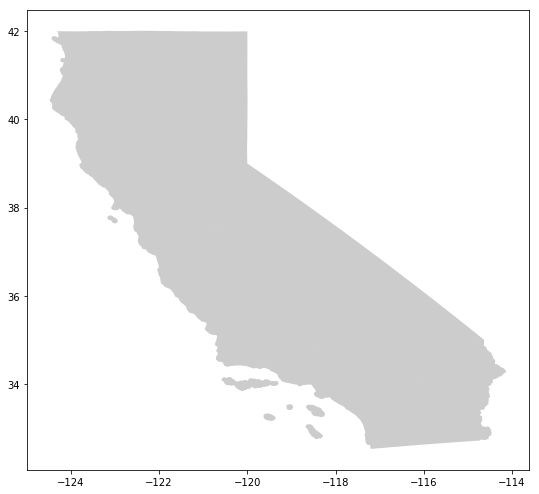

In [6]:
caoutline.plot(facecolor='black', alpha=0.2, figsize=(9,11))

In [7]:
percents = {'blue': {'2013': 56.97, '2015': 56.53, '2017': 59.25, '2019': 66.39},
 'purple': {'2013': 28.32, '2015': 22.1, '2017': 20.92, '2019': 21.95},
 'red': {'2013': 14.71, '2015': 21.37, '2017': 19.83, '2019': 11.66}}

In [8]:
populations = {'blue': {'2013': 21222148,
  '2015': 21058683,
  '2017': 22072892,
  '2019': 24731942},
 'purple': {'2013': 10551863,
  '2015': 8234764,
  '2017': 7794906,
  '2019': 8177075},
 'red': {'2013': 5479945, '2015': 7960509, '2017': 7386158, '2019': 4344939}}

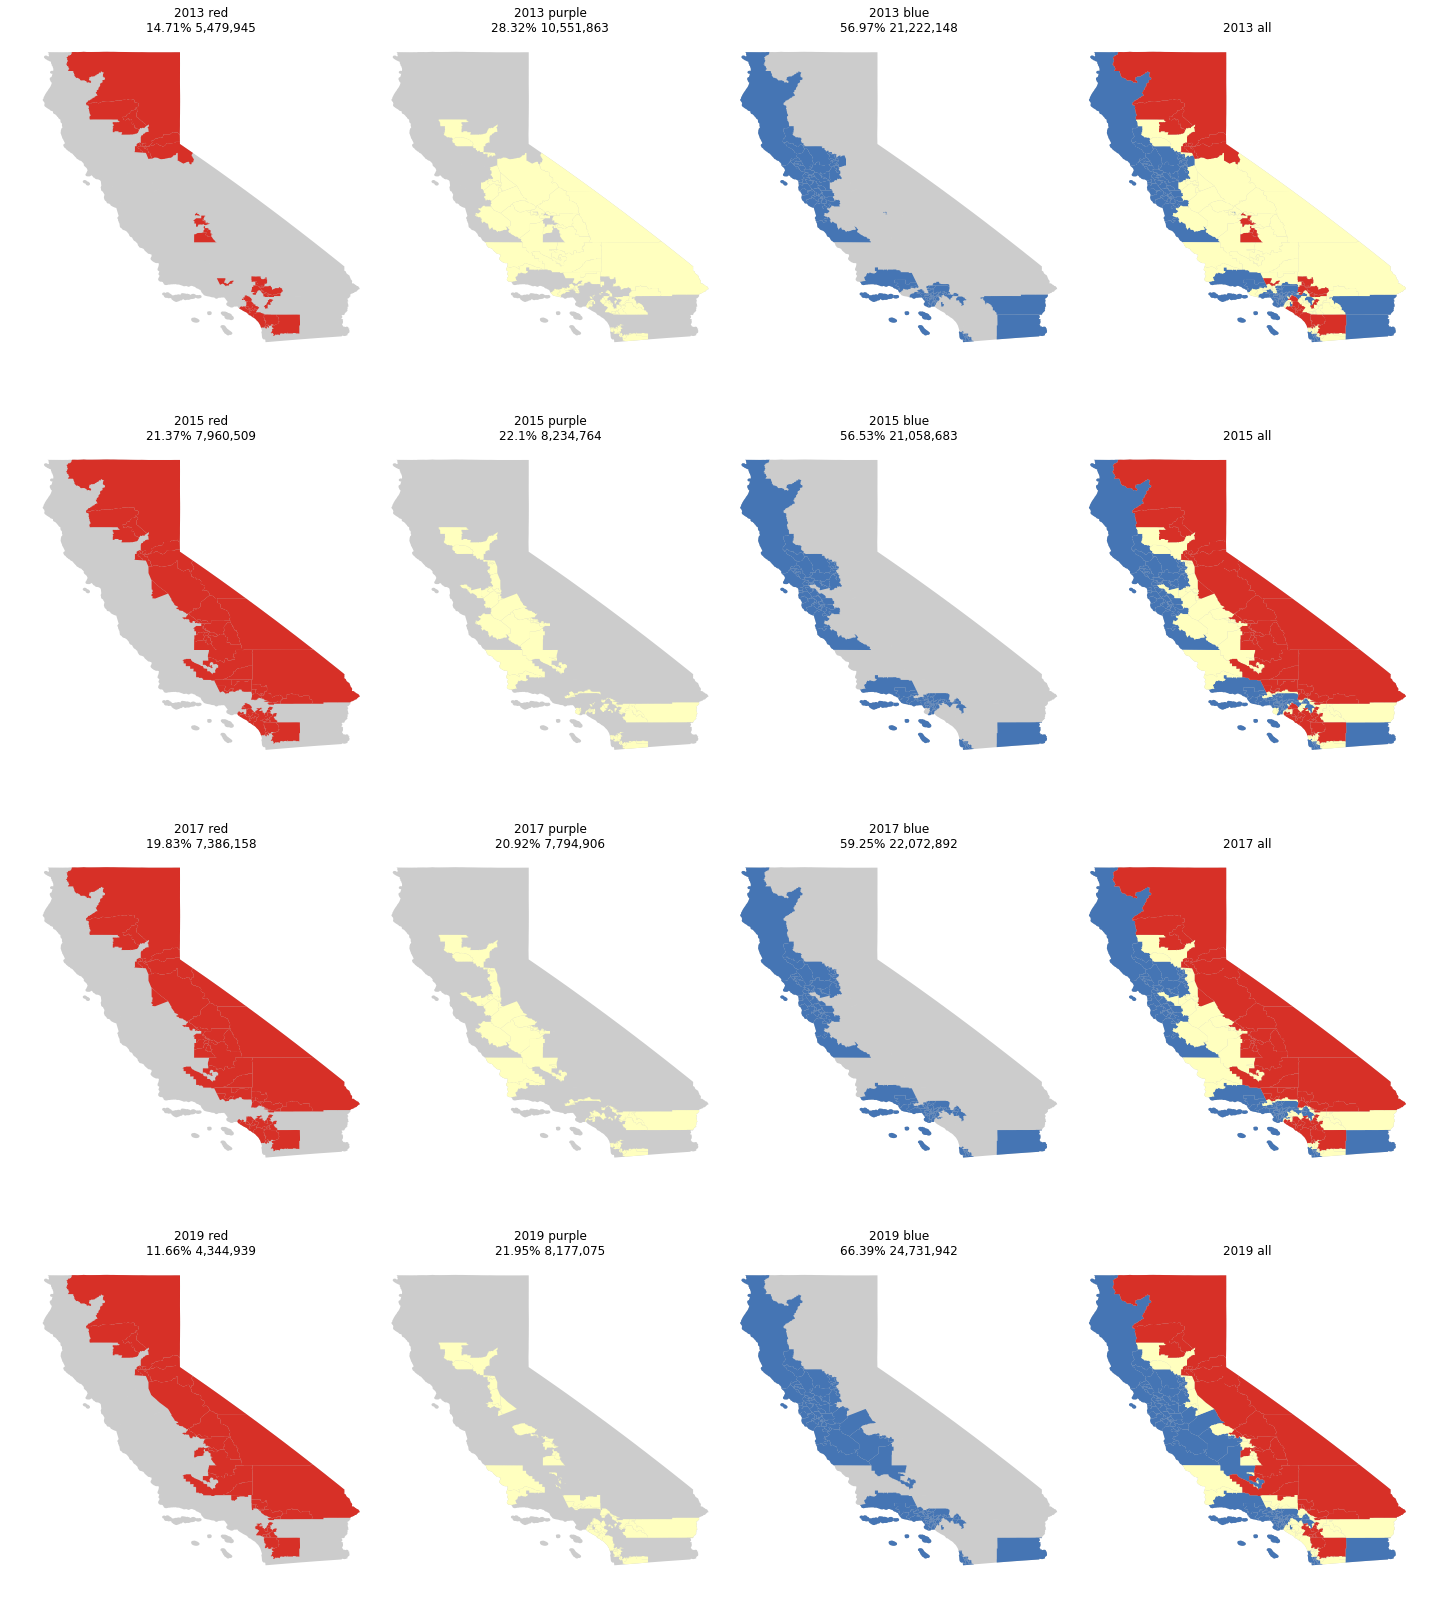

In [9]:
years = [2013,2015,2017,2019]
types = ['red','purple','blue','all']
colors = ['#d73027','#ffffbf','#4575b4']

f, ax = plt.subplots(len(years),len(types), figsize=(25,30))

for i in range(len(years)):
    for j in range(len(types)):
        base = caoutline.plot(ax=ax[i,j], facecolor='black', alpha=0.2)
        if types[j] == 'red':
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'red'].plot(ax=ax[i,j], facecolor='#d73027')
        if types[j] == 'purple':
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'purple'].plot(ax=ax[i,j], facecolor='#ffffbf')
        if types[j] == 'blue':
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'blue'].plot(ax=ax[i,j], facecolor='#4575b4')
        if types[j] == 'all':
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'blue'].plot(ax=ax[i,j], facecolor='#4575b4')
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'purple'].plot(ax=ax[i,j], facecolor='#ffffbf')
            uniquedist[uniquedist['color_{}'.format(str(years[i])[-2:])] == 'red'].plot(ax=ax[i,j], facecolor='#d73027')
        ax[i,j].axis('off')
        titlestr = f'{years[i]} {types[j]}'
        if types[j] != 'all':
            titlestr += f'\n{percents[types[j]][str(years[i])]}% {populations[types[j]][str(years[i])]:,d}'
        ax[i,j].set_title(titlestr)
        
f.subplots_adjust(hspace=0.0, wspace=0.0)

In [10]:
f.savefig('ca-red-purple-blue-by-years.pdf')